<a href="https://colab.research.google.com/github/MaxMaffio/InterviewQuery/blob/main/Doordash_Delivery_Time_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Doordash](https://raw.githubusercontent.com/interviewquery/takehomes/doordash_1/doordash_1/logo.png)
# Overview

In this exercise, you will use your machine learning experience to solve
a straightforward but challenging prediction​ ​problem.​ ​The​ ​exercise​
​contains two​​ parts​

1. Building​ ​a​ ​machine​ ​learning​ model​ ​ ​for​ ​a​ ​prediction ​ task​
2. Writing ​ an​ ​ application​ ​ to​ ​ make​ ​ ​predictions ​ using​ ​ ​that​ ​model.

In Part 1, we would love to have you exhibit your modeling skills. You
will be evaluated on the following - performance on the test set,
feature engineering choices including features used and encoding of
features, data processing, choice of models used, description of model
performance and insights and observations from the​ ​model.

Part 2 is your chance to show off your software engineering skills. This
includes performance of the application, adherence to common software
engineering patterns (unit tests, modular code, etc.) and ability to
make educated​ ​trade-offs​ ​based​ ​on​ ​the​ ​given ​ constraints.​

**NOTE:** For​ this part, you must use a production ready language like
Python. Thus, please do not use R.

# Problem ​Description

When​ a​ ​consumer​ ​places​ ​an​ ​order​ ​on​ DoorDash,​​ we​ ​ show​ ​ the​ ​ ​expected ​
​time of​​ ​delivery.​ ​It​ ​is​ ​very ​important​ ​for​ DoorDash to get this right, as it has a big impact on consumer experience. In this exercise, you will build a model to predict the
estimated time taken for a delivery and write an application that can
make these predictions.

Concretely, for a given delivery you must predict the ​**total delivery
duration seconds** , i.e., the time taken from

- Start:​ ​the​ ​time​ ​consumer​ ​submits​ ​the​ ​order ​ (​`created_at`) ​ to​
- End:​ ​when​ ​the​ ​order​ ​will​ ​be​ ​delivered​ to​ ​ ​the​ consumer​​
​(`actual_delivery_time`).

To​ ​help​ ​with​ ​this,​ ​we​ ​have​ ​provided

-   `historical_data.csv`:​ ​table​ ​of​ ​historical​ ​deliveries

-   `data_to_predict.json`: ​ ​Json​ ​list​ ​of​ ​deliveries​ ​that​ ​you​ ​must​
    ​predict​ ​on​ ​(for ​​the​ ​second​ ​part)

-   `data_description.txt`:​ ​ description​ ​ of​ ​ all​ ​ columns​ ​ in​​ `historical_data.csv`​ ​and​ ​details​ of​ `data_to_predict.json`

# Requirements

## Part ​ 1​

-   Build a model to predict the total delivery duration seconds (as
    defined above). Feel free to generate additional​ ​features​ ​from​ ​the ​ given​ ​ data​ ​ to​ ​ improve​ ​ model​ ​performance.​
-   Explain a) model(s) used, b) how you evaluated your model
    performance on the historical data, c) any data processing you
    performed on the data, d) feature engineering choices you made
    and e) other information​ ​you​ ​would​ ​like​ ​us​ ​to​ ​know​ ​about​ ​your​
    ​modeling​ ​approach.
-   Based ​ on​ ​ the​ ​ ​findings ​​from​ ​the​ ​model,​ list​​ ​recommendations​ to​​
    ​reduce​ ​delivery​ ​time

### Deliverables

-   Submit one document that includes a write-up explaining your model,
    choices made and discussion on the​ ​questions ​ above.​
-   Submit​ ​the​ ​code​ ​used​ ​for​ ​this​ ​part

## Part ​ 2​
-   Write an application that accepts data from the json file
    (`data_to_predict.json`), uses the model to make a prediction for each
    delivery in the json file and writes out predictions to a new ​*tab separated file* (`tsv`) with​ ​columns​ ​-​ ​`delivery_id`, ​`predicted_delivery_seconds`

-   Your predictions on this test data set will be evaluated using RMSE
    (Root Mean Squared Error) and your ​ score​ ​ must​ ​ exceed​ ​ a​ ​ baseline​
    ​ set​ ​ for​ ​ the​ ​ ​task.

### Deliverables

-   Code that ​​outputs a​ ​`tsv`​ ​file​ ​that​ ​gives ​the​​ ​prediction​ ​for​ ​the​
     `data_to_predict.json` data.​ This application (that makes
    predictions) must be runnable from the command line with
    `data_to_predict.json` passed as input. Include instructions for
    running the code (dependencies,​ ​packages​ ​required,​ ​etc.)

# Notes

We expect the exercise to take 5-6 hours in total, but feel free to
spend as much time as you like on it. Feel free to​ ​use​ ​any​ ​open​ ​source​
​packages​ ​for​ ​the​ ​task.

**Thank**​ ​**you**​ ​**for**​ ​**your**​ ​**hard**​ ​**work!**​ ​**Please**​ ​**let**​
​**us**​ ​**know**​ ​**if**​ ​**you**​ ​**have**​ ​**any**​ ​**questions.**​ ​**Good**​
​**luck!**


In [39]:
!cat data_description.txt

#### Data description #### 
The attached file `historical_data.csv` contains a subset of deliveries received at DoorDash in early 2015 in a subset of the cities. Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below. Note all money (dollar) values given in the data are in cents and all time duration values given are in seconds 
The target value to predict here is the total seconds value between `created_at` and `actual_delivery_time`. 

We have added noise to the dataset to obfuscate certain business details. Both `historical_data.csv` and `data_to_predict.json` include similar noise. We will only be evaluating your model's performance on this noisy, artificial dataset. The baseline model we will compare it was also trained and evaluated on the same noisy dataset.

#### Columns in historical_data.csv

### Time features
market_id: A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id
created_at

In [2]:
!git clone --branch doordash_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/doordash_1
!ls

Cloning into 'takehomes'...
remote: Enumerating objects: 1963, done.
remote: Counting objects: 100% (1963/1963), done.
remote: Compressing objects: 100% (1220/1220), done.
remote: Total 1963 (delta 752), reused 1928 (delta 726), pack-reused 0 (from 0)
Receiving objects: 100% (1963/1963), 297.43 MiB | 7.23 MiB/s, done.
Resolving deltas: 100% (752/752), done.
/content/takehomes/doordash_1
data_description.txt  historical_data.csv  metadata.json
data_to_predict.json  logo.png		   takehomefile.ipynb


In [27]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from xgboost import cv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
os.listdir()

['metadata.json',
 'takehomefile.ipynb',
 'historical_data.csv',
 'logo.png',
 'data_description.txt',
 'data_to_predict.json']

# READ DATA

In [4]:
# read historical_data.csv
df = pd.read_csv("historical_data.csv")
print(df.shape)
# create target variable
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])
df["created_at"] = pd.to_datetime(df["created_at"])
df["delivery_duration_seconds"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds()
# add order_id
df.reset_index(drop=False,inplace=True)
df.rename(columns={"index":"order_id"},inplace=True)

# print
print(df.shape)
df.head()

(197428, 16)
(197428, 18)


,order_id,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration_seconds
0,0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [5]:
# clean the dataset
# remove records where the target variable can not be calculated
df = df[df["actual_delivery_time"].isna()==False]
# remove outliers
n_upper_threshold =  np.percentile(df['delivery_duration_seconds'], q=99)
df = df[df["delivery_duration_seconds"]<n_upper_threshold]
print(df.shape)

(195446, 18)


In [6]:
#pd.read_json("data_to_predict.json",lines=True).head()

# EXPLORATIVE ANALYSIS

In [37]:
list_cols = df.columns
df_na = pd.DataFrame(columns=["column","NaN"])

for str_col in list_cols:
  df_na_subset = pd.DataFrame({"column":[str_col], "NaN":[df[str_col].isna().sum()]})
  df_na = pd.concat([df_na, df_na_subset])
df_na[df_na["NaN"]>0]

,column,NaN
0,market_id,974
0,store_primary_category,4702
0,order_protocol,987
0,total_onshift_dashers,16103
0,total_busy_dashers,16103
0,total_outstanding_orders,16103
0,estimated_store_to_consumer_driving_duration,523


In [31]:
df["store_primary_category"].value_counts()

,count
store_primary_category,
american,19213
pizza,17112
mexican,16998
burger,10861
sandwich,9974
chinese,9309
japanese,9024
dessert,8655
fast,7305


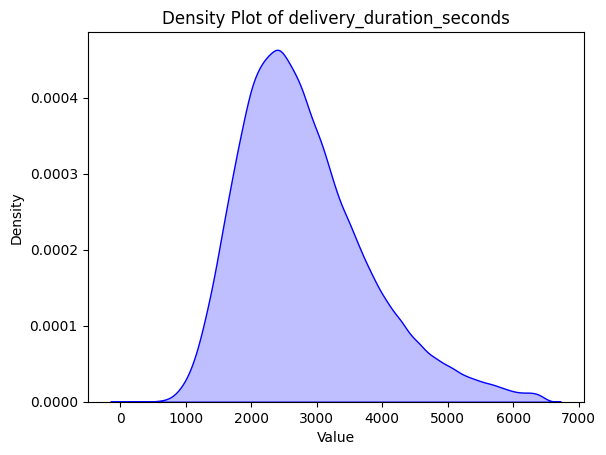

In [8]:
# plot density of delivery_duration_seconds
# Create the density plot
sns.kdeplot(df["delivery_duration_seconds"], fill=True, color="blue", bw_adjust=1)  # `fill=True` for a shaded plot

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of delivery_duration_seconds')
plt.show()

In [9]:
# Calculate percentiles from 0 to 100 every 10
list_percentiles = [0,10,20,30,40,50,60,70,80,90,99,99.99,100]
percentiles = np.percentile(df['delivery_duration_seconds'], q=list_percentiles)

# Display the result as a dataframe for clarity
percentile_df = pd.DataFrame({
    'Percentile': list_percentiles,
    'Value': percentiles
})
percentile_df

,Percentile,Value
0,0.00,101.00
1,10.00,1695.00
2,20.00,1981.00
3,30.00,2211.00
4,40.00,2428.00
5,50.00,2648.00
6,60.00,2890.00
7,70.00,3177.00
8,80.00,3557.00
9,90.00,4155.50


# FEATURE ENGINEER

## encode categorical variables

Encode the categorical with the target encoding method

In [ ]:
list_cat_features = ['store_primary_category']

## fillna

In [38]:
list_cols_with_nan = df_na.loc[df_na["NaN"]>0, "column"].tolist()
list_cols_with_nan

['market_id',
 'store_primary_category',
 'order_protocol',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'estimated_store_to_consumer_driving_duration']

# MODEL

In [21]:
list_features = ['order_id',
 'market_id',
 #'created_at',
 #'actual_delivery_time',
 'store_id',
 'store_primary_category',
 'order_protocol',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'estimated_order_place_duration',
 'estimated_store_to_consumer_driving_duration',
 #'delivery_duration_seconds'
 ]

In [22]:
# train and test set
X = df[list_features]
y = df["delivery_duration_seconds"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(136812, 14)
(58634, 14)


In [29]:
# run XGBoosting Regressor
## hyperparameters
param_grid = {
    'learning_rate': [0.1,0.2,0.5,0.7],
    'n_estimators': [80,100,150,200],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
}

# evaluate the model
model = GradientBoostingRegressor()
# grid search cv
grid_search = GridSearchCV(estimator = model,
                           param_grid = param_grid,
                           cv = 3,
                           n_jobs = -1,
                           verbose = True)
# fit the cv
grid_search.fit(X, y)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


ValueError: 
All the 3456 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3456 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 658, in fit
    X, y = validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
